In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sp500_companies = pd.read_csv('../data/sp500_companies.csv')
sp500_index = pd.read_csv('../data/sp500_index.csv')
sp500_stocks = pd.read_csv('../data/sp500_stocks.csv')


In [18]:
print(sp500_companies.head())
print(sp500_index.head())
print(sp500_stocks.head())


  Exchange Symbol              Shortname               Longname  \
0      NMS   AAPL             Apple Inc.             Apple Inc.   
1      NMS   NVDA     NVIDIA Corporation     NVIDIA Corporation   
2      NMS   MSFT  Microsoft Corporation  Microsoft Corporation   
3      NMS  GOOGL          Alphabet Inc.          Alphabet Inc.   
4      NMS   GOOG          Alphabet Inc.          Alphabet Inc.   

                   Sector                        Industry  Currentprice  \
0              Technology            Consumer Electronics        222.91   
1              Technology                  Semiconductors        135.40   
2              Technology       Software - Infrastructure        410.37   
3  Communication Services  Internet Content & Information        171.29   
4  Communication Services  Internet Content & Information        172.65   

       Marketcap        Ebitda  Revenuegrowth           City State  \
0  3389146005504  1.346610e+11          0.061      Cupertino    CA   
1  332

In [20]:
print(sp500_companies.info())
print(sp500_index.info())
print(sp500_stocks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             503 non-null    object 
 1   Symbol               503 non-null    object 
 2   Shortname            503 non-null    object 
 3   Longname             503 non-null    object 
 4   Sector               503 non-null    object 
 5   Industry             503 non-null    object 
 6   Currentprice         503 non-null    float64
 7   Marketcap            503 non-null    int64  
 8   Ebitda               473 non-null    float64
 9   Revenuegrowth        500 non-null    float64
 10  City                 503 non-null    object 
 11  State                483 non-null    object 
 12  Country              503 non-null    object 
 13  Fulltimeemployees    493 non-null    float64
 14  Longbusinesssummary  503 non-null    object 
 15  Weight               503 non-null    flo

In [22]:
print(sp500_companies.isnull().sum())
print(sp500_index.isnull().sum())
print(sp500_stocks.isnull().sum())

Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 30
Revenuegrowth           3
City                    0
State                  20
Country                 0
Fulltimeemployees      10
Longbusinesssummary     0
Weight                  0
dtype: int64
Date      0
S&P500    0
dtype: int64
Date              0
Symbol            0
Adj Close    101626
Close        101626
High         101626
Low          101626
Open         101626
Volume       101626
dtype: int64


In [24]:
print(sp500_companies.describe())
print(sp500_index.describe())
print(sp500_stocks.describe())

       Currentprice     Marketcap        Ebitda  Revenuegrowth  \
count    503.000000  5.030000e+02  4.730000e+02     500.000000   
mean     217.590080  1.064192e+11  6.950376e+09       0.070314   
std      506.386951  3.158573e+11  1.549162e+10       0.178221   
min        8.230000  6.792689e+09 -4.107000e+09      -0.602000   
25%       68.270000  1.937372e+10  1.629670e+09       0.004000   
50%      121.160000  3.745356e+10  2.885000e+09       0.050500   
75%      228.545000  8.063409e+10  6.009000e+09       0.109000   
max     9139.390000  3.389146e+12  1.365520e+11       1.632000   

       Fulltimeemployees      Weight  
count       4.930000e+02  503.000000  
mean        5.746856e+04    0.001988  
std         1.390018e+05    0.005901  
min         2.800000e+01    0.000127  
25%         1.020000e+04    0.000362  
50%         2.150000e+04    0.000700  
75%         5.374900e+04    0.001506  
max         2.100000e+06    0.063314  
            S&P500
count  2518.000000
mean   3292.6835

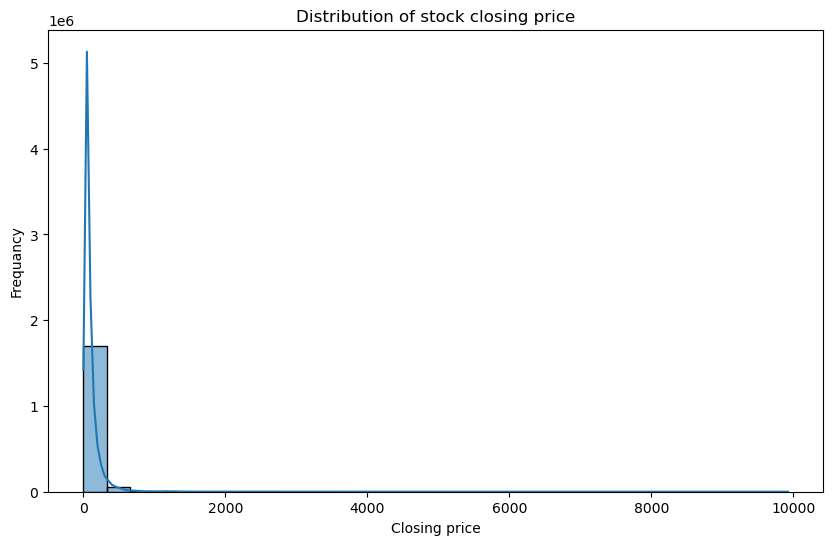

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(sp500_stocks['Close'], bins=30, kde=True)
plt.title('Distribution of stock closing price')
plt.xlabel('Closing price')
plt.ylabel('Frequancy')
plt.show()


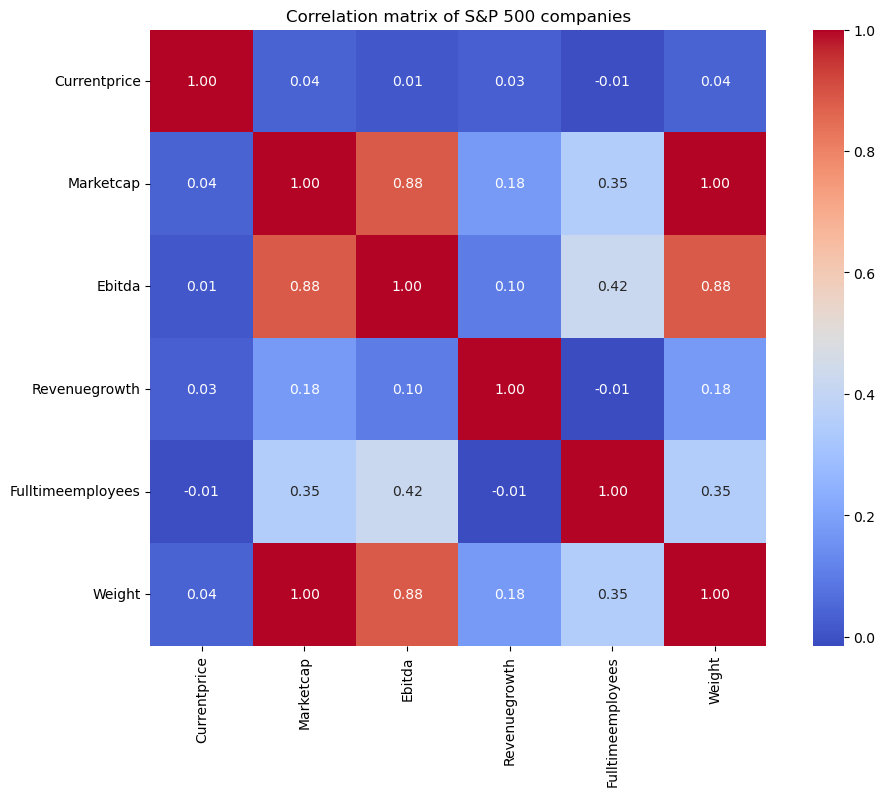

In [30]:
numeric_df = sp500_companies.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of S&P 500 companies')
plt.show()

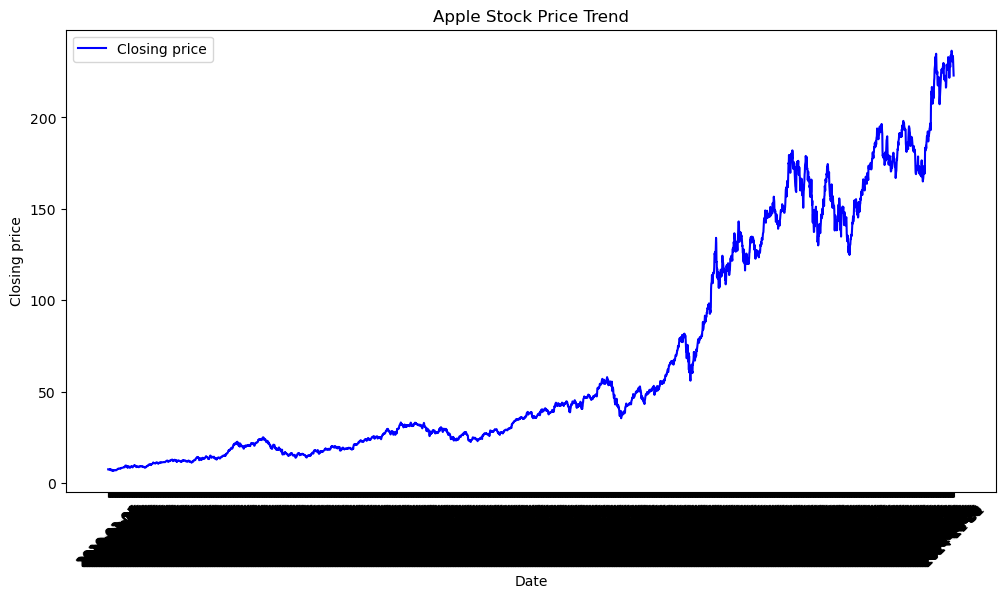

In [34]:
apple_data = sp500_stocks[sp500_stocks['Symbol'] == 'AAPL']
plt.figure(figsize=(12, 6))
plt.plot(apple_data['Date'], apple_data['Close'], label='Closing price', color='blue')
plt.title('Apple Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

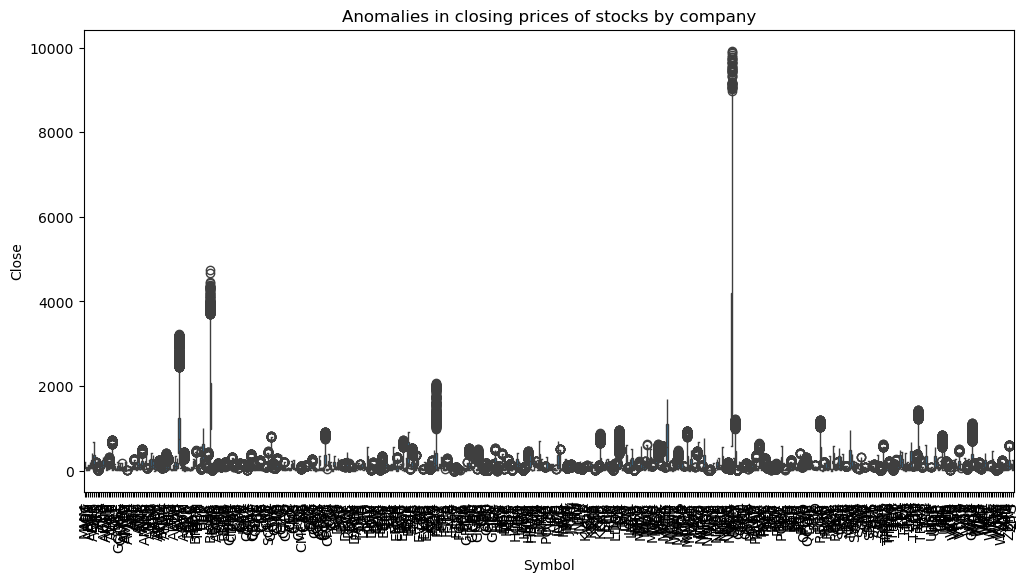

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Symbol', y='Close', data=sp500_stocks)
plt.title('Anomalies in closing prices of stocks by company')
plt.xticks(rotation=90)
plt.show()